In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from pandas.plotting import scatter_matrix

c:\users\harpreet singh\appdata\local\programs\python\python36-64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
df = pd.read_csv('ccpp.csv')
df['bias'] =1 #adding bias element

#Inputs and Output
X = scale(np.array(df.drop(['PE'],1)))
X[:,4]=1 #adding bias element
y = np.array(df['PE'])
y = y.reshape((y.shape[0],1)) #reshaping n, to n,1


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20,random_state = 42)
#scatter_matrix(df,alpha=0.2,figsize=(6,6),diagonal='kde')

[[480.48]
 [445.75]
 [438.76]
 ...
 [465.96]
 [450.93]
 [451.67]]


In [259]:
#for single feature
def linear_regression():
    x = tf.placeholder(tf.float32,name = 'x')
    y = tf.placeholder(tf.float32,name = 'y')
    
    with tf.variable_scope('lreg') as scope:
        w = tf.Variable(np.random.normal(),name='w')
        b = tf.Variable(np.random.normal(),name='b')
        y_pred = tf.multiply(w,x)+b
        
        loss = tf.reduce_mean(tf.square(y_pred - y))
        
    return x,y,y_pred,loss,w

    #plt.figure(1)
    #plt.scatter(X_train,y_train)
    #plt.plot(X_train,y_train)
    #plt.savefig('plot.png') 

In [260]:
def multiVlinear_regression():
    n = X_train.shape[1]

    x = tf.placeholder(tf.float32,[None,n],name='x')
    y = tf.placeholder(tf.float32,[None,1],name='y')
    
    with tf.variable_scope('lreg') as scope:
        w = tf.Variable(tf.zeros((1,n)),name='w')
        y_pred = tf.multiply(w,x)
        
        loss = tf.reduce_mean(tf.square(y_pred - y))
        
    return x,y,y_pred,loss,w

In [284]:
def run(epochs):
    
    x,y,y_pred,loss,w = multilinear_regression()
    optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
    cost = np.zeros(epochs)

    with tf.Session() as session:
        
        init = tf.global_variables_initializer()
        session.run(init)
    
        feed_dict = {x:X_train,y:y_train}
        for i in range(epochs):
            loss_val,i = session.run([loss,optimizer],feed_dict)
            #print('loss:',loss_val.mean())  
            cost[i]=loss_val.mean()
        #y_pred_batch = session.run(y_pred,{x:X_train})
        
        thetas = session.run(w)
    return thetas,cost
   

Estimated parameters:  [[-16.180649 -14.529609   6.597295  11.194056 454.24762 ]]


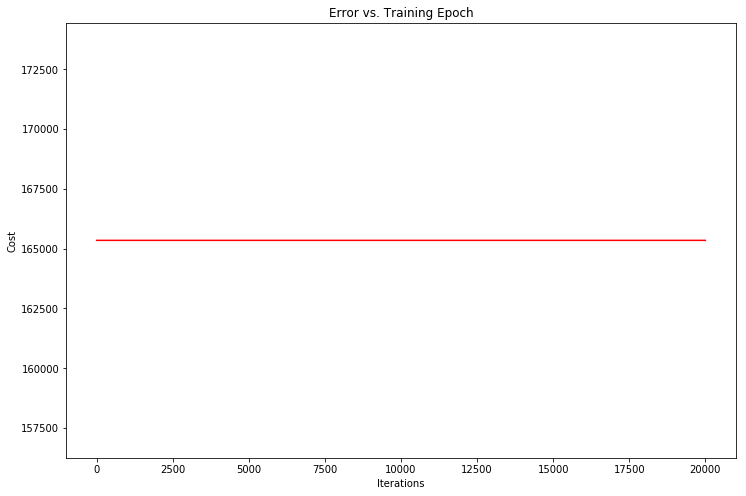

In [289]:
if __name__=='__main__':
    epochs = 20000
    thetas,cost=run(epochs) 
    print('Estimated parameters: ',thetas)
    fig, ax = plt.subplots(figsize=(12,8))  
    ax.plot(np.arange(epochs), cost, 'r')  
    ax.set_xlabel('Iterations')  
    ax.set_ylabel('Cost')  
    ax.set_title('Error vs. Training Epoch') 

In [283]:
#Scikit learn
#Coefficients: [-14.73251595  -2.98326107   0.34593379  -2.30884968]
#Intercept: 454.4289437515408

In [290]:
def prediction(X, Theta):
    y_pred = np.dot(X,np.transpose(Theta))

    return y_pred

In [291]:
def compute_cost(X, y, parameters):

    return np.sum(np.square(prediction(X, parameters) - y)) / (2 * len(y))

In [292]:
testpred = prediction(X_test, thetas)
accuracy = compute_cost(X_test,y_test,thetas)
print(accuracy)

302.17957020829317


In [ ]:
#reference: soonhin khor
#https://www.youtube.com/watch?v=F8g_6TXKlxw